# Exploratory Data Analysis 

In [1]:
# Importing Required Libraries
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Reading the dataframe using pandas
data = pd.read_csv('Football.csv')

In [3]:
# Checking for the NULL values if any
data.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

In [4]:
# dropping the NaN value record
data = data.dropna()

In [5]:
temp_data = data.copy()

In [6]:
def addPosCat(inputCat):

    if inputCat == 1:
        return('Attackers')
    elif inputCat == 2:
        return('Midfielders')
    elif inputCat == 3:
        return('Defenders')
    else:
        return('Goalkeeper')

temp_data['position_cat'] = temp_data['position_cat'].apply(addPosCat)

In [7]:
def addRegion(inpregion):
    
    if inpregion == 1:
        return('England')
    elif inpregion == 2:
        return('EU')
    elif inpregion == 3:
        return('Americans')
    else:
        return('Rest of World')

temp_data['region'] = temp_data['region'].apply(addRegion)

In [8]:
temp_data.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,Attackers,65.0,4329,12.0,17.10%,264,Americans,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,Attackers,50.0,4395,9.5,5.60%,167,EU,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,Goalkeeper,7.0,1529,5.5,5.90%,134,EU,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,Attackers,20.0,2393,7.5,1.50%,122,England,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,Defenders,22.0,912,6.0,0.70%,121,EU,France,0,4,1,1,0


In [9]:
temp_data.dtypes

name             object
club             object
age               int64
position         object
position_cat     object
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
region           object
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
dtype: object

In [10]:
temp_data[['age_cat','age']].corr()

,age_cat,age
age_cat,1.000000,0.972208
age,0.972208,1.000000


age_cat is highly correlated to age.

In [11]:
def retrieveAgeCategories(temp_data):
    int_age_categories = sorted(temp_data['age_cat'].unique())
    age_categories = {}
    for i in int_age_categories:
        records = (temp_data[temp_data['age_cat'] == i])
        age_categories[i] = str(min(records['age'])) + "-" + str(max(records['age']))
    return age_categories

age_categories = retrieveAgeCategories(temp_data)
age_categories

{1: '17-21', 2: '22-24', 3: '25-27', 4: '28-31', 5: '32-33', 6: '34-38'}

In [12]:
def age_cat_convert(inp_age_cat, age_categories):
    return age_categories[inp_age_cat]

temp_data['age_cat'] = temp_data['age_cat'].apply(age_cat_convert, args=(age_categories,))

In [13]:
temp_data.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,Attackers,65.0,4329,12.0,17.10%,264,Americans,Chile,0,28-31,1,1,0
1,Mesut Ozil,Arsenal,28,AM,Attackers,50.0,4395,9.5,5.60%,167,EU,Germany,0,28-31,1,1,0
2,Petr Cech,Arsenal,35,GK,Goalkeeper,7.0,1529,5.5,5.90%,134,EU,Czech Republic,0,34-38,1,1,0
3,Theo Walcott,Arsenal,28,RW,Attackers,20.0,2393,7.5,1.50%,122,England,England,0,28-31,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,Defenders,22.0,912,6.0,0.70%,121,EU,France,0,28-31,1,1,0


In [14]:
temp_data['position'].unique()

array(['LW', 'AM', 'GK', 'RW', 'CB', 'RB', 'CF', 'LB', 'DM', 'RM', 'CM',
       'SS', 'LM'], dtype=object)

In [15]:
temp_data['club'].unique()

array(['Arsenal', 'Bournemouth', 'Brighton+and+Hove', 'Burnley',
       'Chelsea', 'Crystal+Palace', 'Everton', 'Huddersfield',
       'Leicester+City', 'Liverpool', 'Manchester+City',
       'Manchester+United', 'Newcastle+United', 'Southampton',
       'Stoke+City', 'Swansea', 'Tottenham', 'Watford', 'West+Brom',
       'West+Ham'], dtype=object)

In [16]:
temp_data['position_cat'].unique()

array(['Attackers', 'Goalkeeper', 'Defenders', 'Midfielders'],
      dtype=object)

In [17]:
temp_data['nationality'].unique()

array(['Chile', 'Germany', 'Czech Republic', 'England', 'France', 'Spain',
       'Nigeria', 'Switzerland', 'Wales', 'Brazil', 'Egypt', 'Argentina',
       'Colombia', 'Bosnia', 'Norway', 'Poland', 'Scotland', 'Congo DR',
       'Ireland', 'Netherlands', 'Australia', "Cote d'Ivoire", 'Finland',
       'Cameroon', 'Austria', 'Israel', 'Northern Ireland', 'Canada',
       'Belgium', 'Iceland', 'Serbia', 'Portugal', 'Ghana', 'South Korea',
       'Mali', 'Senegal', 'Curacao', 'Denmark', 'Slovenia',
       'Trinidad and Tobago', 'Bermuda', 'Algeria', 'Jamaica', 'Japan',
       'Tunisia', 'Croatia', 'Estonia', 'Ecuador', 'Armenia', 'Italy',
       'Sweden', 'United States', 'Morocco', 'The Gambia', 'Kenya',
       'Greece', 'Uruguay', 'Romania', 'Venezuela', 'New Zealand'],
      dtype=object)

In [18]:
temp_data['region'].unique()

array(['Americans', 'EU', 'England', 'Rest of World'], dtype=object)

In [19]:
temp_data['club_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

In [20]:
# variable name may not help in prediction
# club_id and club represents same thing. 
# So let's drop name and club_id columns
temp_data.drop(['name','club_id'],axis=1,inplace=True)

#### Conclusion
i) new_signing, new_foreign, big_club are binary variables<br>
ii) nationality, position, club, position_cat, region, club_id are categorical variables<br>
iii) age, page_views, fpl_value, fpl_points are contiuous numeric variables<br>
iv) fpl_sel represents % of FPL players who have selected that player in their team. It is given as of string datatype.<br>
v) club has been mapped onto integer values which are represented using club_id

In [21]:
# Converting fpl selection into numeric variable 
temp_data['fpl_sel'] = temp_data['fpl_sel'].map(lambda x: str(x)[:-1]).astype('float')/100
temp_data.head() 

,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,big_club,new_signing
0,Arsenal,28,LW,Attackers,65.0,4329,12.0,0.171,264,Americans,Chile,0,28-31,1,0
1,Arsenal,28,AM,Attackers,50.0,4395,9.5,0.056,167,EU,Germany,0,28-31,1,0
2,Arsenal,35,GK,Goalkeeper,7.0,1529,5.5,0.059,134,EU,Czech Republic,0,34-38,1,0
3,Arsenal,28,RW,Attackers,20.0,2393,7.5,0.015,122,England,England,0,28-31,1,0
4,Arsenal,31,CB,Defenders,22.0,912,6.0,0.007,121,EU,France,0,28-31,1,0


# Data Exploration

In [22]:
temp_data.describe()

,age,market_value,page_views,fpl_value,fpl_sel,fpl_points,new_foreign,big_club,new_signing
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.00000,460.000000,460.000000,460.000000
mean,26.815217,11.024022,765.315217,5.446739,0.032500,57.43913,0.034783,0.304348,0.145652
std,3.959846,12.268045,932.233794,1.347915,0.056805,53.10415,0.183428,0.460632,0.353141
min,17.000000,0.050000,3.000000,4.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,24.000000,3.000000,220.750000,4.500000,0.002000,5.00000,0.000000,0.000000,0.000000
50%,27.000000,7.000000,460.000000,5.000000,0.010000,51.00000,0.000000,0.000000,0.000000
75%,30.000000,15.000000,900.000000,5.500000,0.033000,94.00000,0.000000,1.000000,0.000000
max,38.000000,75.000000,7664.000000,12.500000,0.450000,264.00000,1.000000,1.000000,1.000000


## Note:
A baseline model is when we predict market_value for all players as the average (mean) market_value in the given data. The Root Mean Square Error is the standard deviation which we can see above is 12.268045

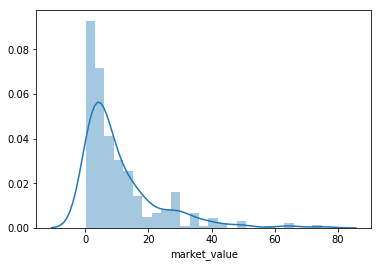

In [23]:
sns.distplot(temp_data['market_value'])

### Conclusions
i) There is a skew in the distribution of market_value, as the mean is greater than median<br>
ii) page_views has high standard deviation 

In [24]:
corr = temp_data.corr()
corr

,age,market_value,page_views,fpl_value,fpl_sel,fpl_points,new_foreign,big_club,new_signing
age,1.000000,-0.133828,-0.050802,-0.096749,-0.004257,0.185467,-0.126108,-0.125569,-0.080422
market_value,-0.133828,1.000000,0.739540,0.789373,0.548497,0.615013,0.097896,0.593249,0.130970
page_views,-0.050802,0.739540,1.000000,0.731912,0.524609,0.541706,-0.050072,0.502444,0.126671
fpl_value,-0.096749,0.789373,0.731912,1.000000,0.505516,0.620702,0.108843,0.424425,0.098718
fpl_sel,-0.004257,0.548497,0.524609,0.505516,1.000000,0.516691,0.079245,0.269020,-0.027423
fpl_points,0.185467,0.615013,0.541706,0.620702,0.516691,1.000000,-0.205551,0.278997,0.084874
new_foreign,-0.126108,0.097896,-0.050072,0.108843,0.079245,-0.205551,1.000000,0.080718,-0.078381
big_club,-0.125569,0.593249,0.502444,0.424425,0.269020,0.278997,0.080718,1.000000,0.034939
new_signing,-0.080422,0.130970,0.126671,0.098718,-0.027423,0.084874,-0.078381,0.034939,1.000000


In [25]:
corr['market_value'].sort_values()

age            -0.133828
new_foreign     0.097896
new_signing     0.130970
fpl_sel         0.548497
big_club        0.593249
fpl_points      0.615013
page_views      0.739540
fpl_value       0.789373
market_value    1.000000
Name: market_value, dtype: float64

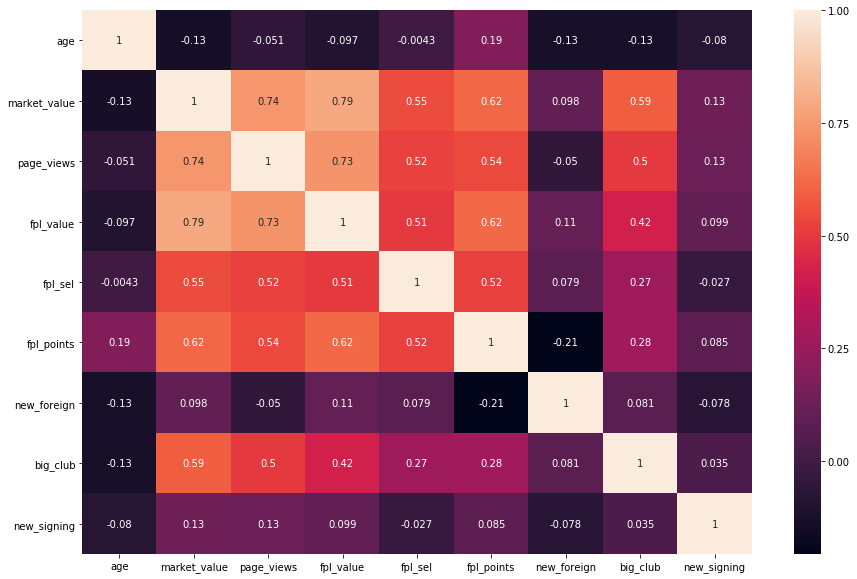

In [26]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot = True)

### Conclusion
fpl_value, page_views, fpl_points, big_club, fpl_sel are highly correlated to the market_value

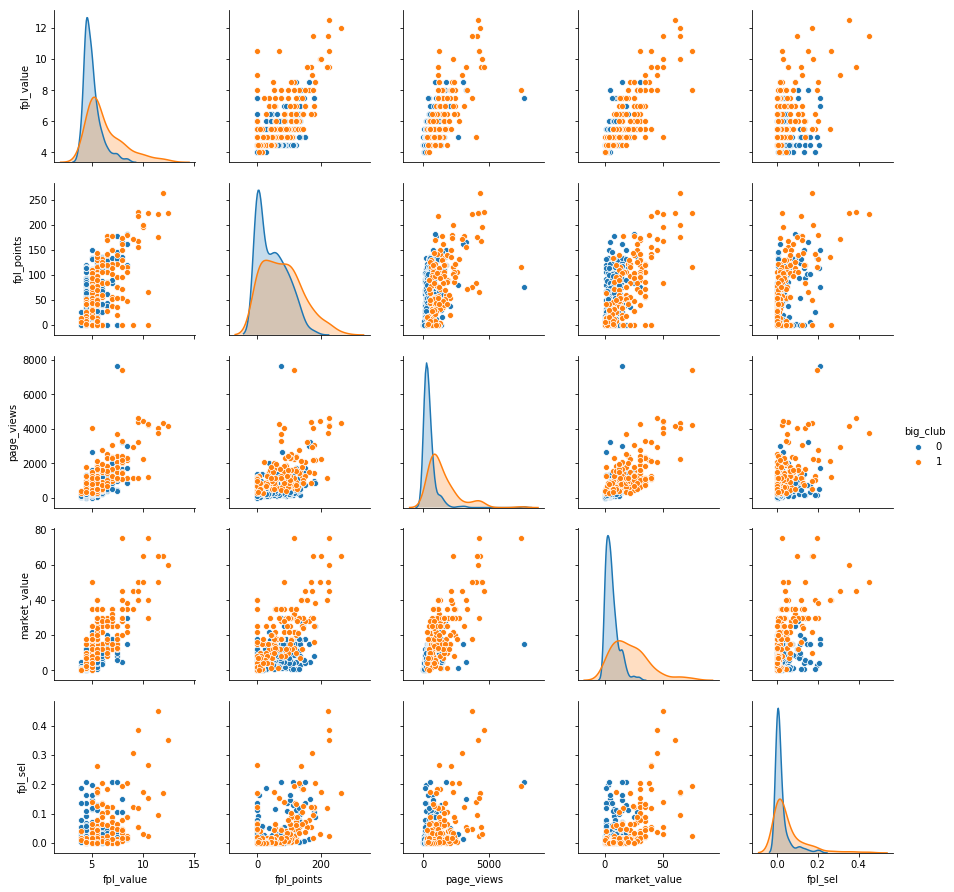

In [27]:
sns.pairplot(temp_data, hue = 'big_club', vars = ['fpl_value','fpl_points','page_views','market_value','fpl_sel'], height=2.5)

In [28]:
sns.set(font_scale=1.5)

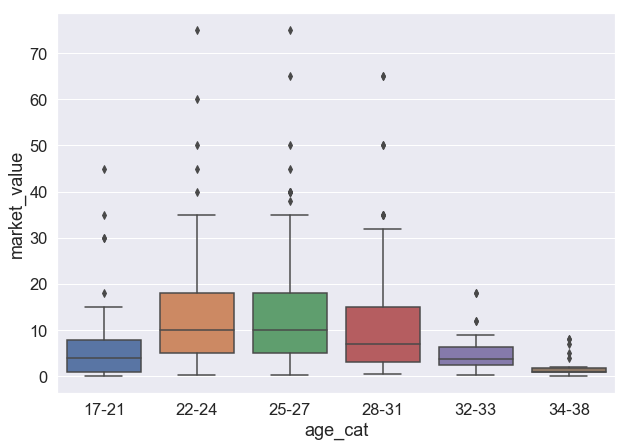

In [29]:
plt.figure(figsize=(10, 7)) 
sns.boxplot(x = 'age_cat', y = "market_value", data = temp_data, order = list(age_categories.values()))

The median market value for players in the age category 22-27 is more than the other age categories

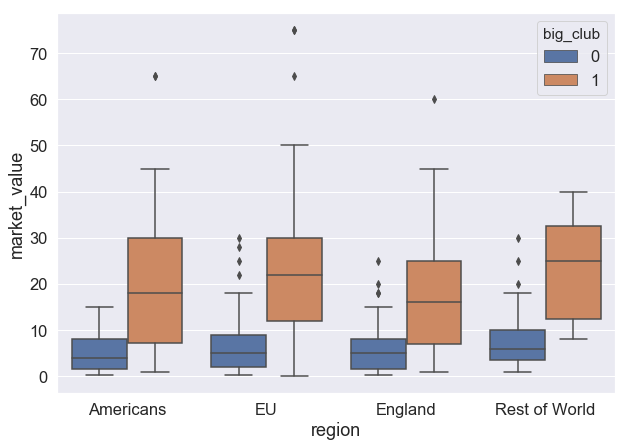

In [30]:
plt.figure(figsize=(10, 7)) 
sns.boxplot(x = 'region', y = "market_value", hue = 'big_club', data = temp_data)

Players belonging to one of the top 6 clubs have high market value for all regions.<br> In addition to being higher, it also seems like there is a larger variance in market value for players belonging to one of the six big_clubs.<br> Also note that players from big club in Europe region have high market value as compared to other regions.

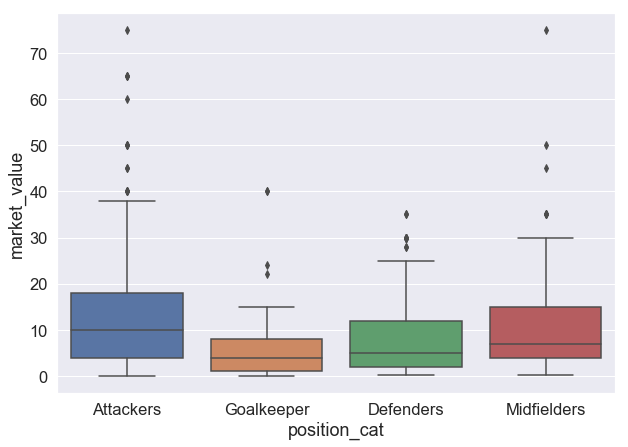

In [31]:
plt.figure(figsize=(10, 7)) 
sns.boxplot(x = 'position_cat', y = "market_value", data = temp_data)

Attackers are more expensive

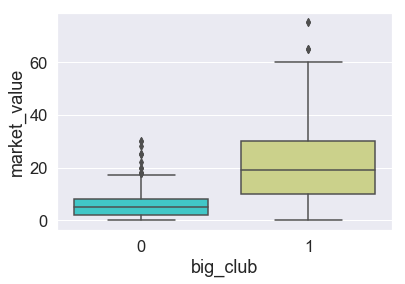

In [32]:
sns.boxplot(x="big_club", y="market_value", data=temp_data, palette='rainbow')

The palyers belonging to big_club have high market_value

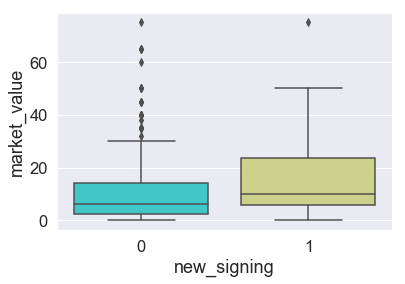

In [33]:
sns.boxplot(x="new_signing", y="market_value", data=temp_data, palette='rainbow')

The players who have a signing for 2017/18 have high median market value

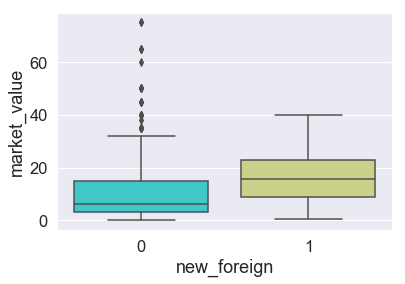

In [34]:
sns.boxplot(x="new_foreign", y="market_value", data=temp_data, palette='rainbow')

The median market value for the players who have a new signing from a different league is high

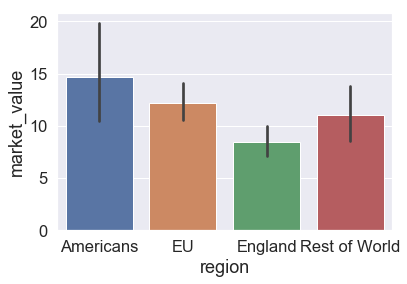

In [35]:
sns.barplot(x='region',y = "market_value", data=temp_data)

The mean market value for players from America region is highest and for players from England region is lowest

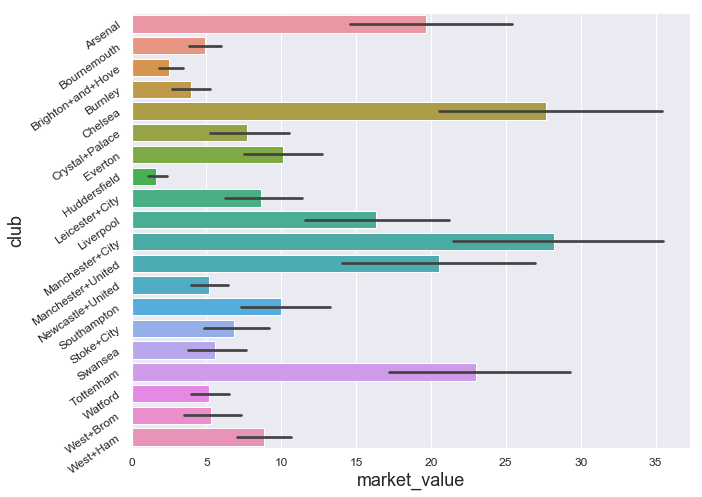

In [36]:
plt.figure(figsize=(10, 8))
plot = sns.barplot(x="market_value", y = "club", data=temp_data)
plt.tick_params(labelsize = 12)
plt.setp(plot.get_yticklabels(), rotation = 35)
plt.show()

The mean market value of Manchester City is the highest and Huddersfield is the lowest

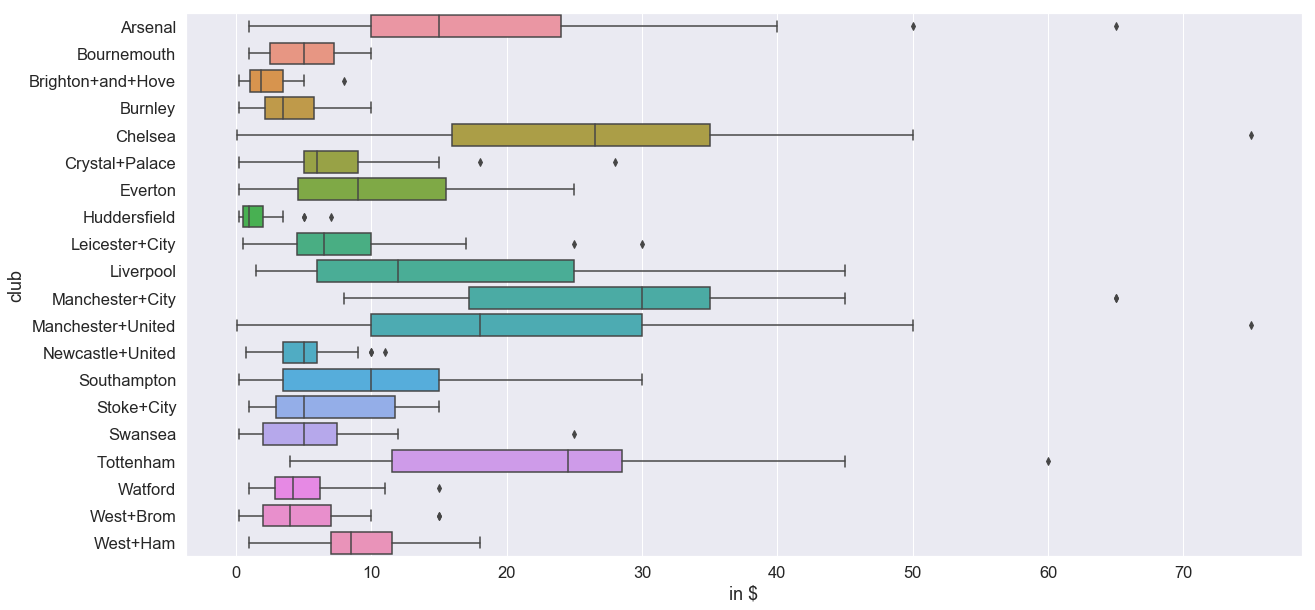

In [37]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(y='club', x = 'market_value',data=temp_data,orient='h')
plt.xlabel("in $")
plt.show()

We can see certain clubs like Chelsea, Manchester+ United, Tottenham pay big amounts to the players

In [38]:
inp_data = data[['fpl_sel','big_club','fpl_points','page_views','fpl_value']]

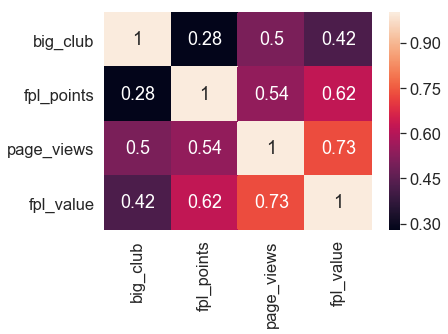

In [39]:
sns.heatmap(inp_data.corr(),annot=True)

### Conclusion 
i) There is a positive correlation between fpl_points and fpl_value<br>
ii) There is a positive correlation between page_views and fpl_value<br>
iii) There appears to be multi-collinearity, i.e., correlation among regressor variables <br>
What to do with these highly correlated variables? 